# Step 0: Imports and loading data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro
pd.set_option('display.max_columns', 500)

In [4]:
data = pd.read_excel('Competition1_raw_data.xlsx')

In [5]:
data.head(25)

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10,9.5,8.5,11.87,122,1,3.43,0.0290743,40962052,10600000,51.345,470,12719,11560,301,690,62,117,139
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8,10,8,7.25,259,0,-1.62,-0.0133516,28869196,2400000,25.936,791,21792,19585,510,1120,71,242,237
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7,14,12,6.7,90,1,-1.24,0.020715,16845668,5000000,7.378,201,5262,4785,128,325,61,33,60
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16,14,12.39,209,1,-0.91,0.0200231,14848637,4500000,8.526,328,8259,7574,177,509,80,59,110
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21,21,19,56.6,80,1,0.07,-0.0348947,30741716,8250000,632.298,572,14830,13176,336,720,67,149,167
5,ACOM,Ancestry.com Inc.,7379,13.5,14.5,12.5,14.2,94,1,0.06,-0.0575561,42402916,7407407,197.591,510,17999,13934,328,815,62,96,181
6,ACOR,ACORDA THERAPEUTICS INC,2836,6,13,11,6.72,128,1,-1.87,0.00410552,19047022,5500000,5.146,495,15758,13953,379,698,82,106,135
7,ACRX,ACELRX PHARMACEUTICALS INC,2834,5,14,12,4.55,91,0,-0.74,0.04062,19371750,8000000,-,334,11226,10056,276,-1,55,120,122
8,ACTV,ACTIVE NETWORK INC,7372,15,18,16,15.9,100,1,-0.51,-0.0293159,52982501,11000000,279.6,620,14813,13463,335,917,58,124,234
9,ACW,ACCURIDE CORP,3714,9,19,17,0,106,1,1.49,-0.0249251,33622690,11000000,494.008,385,9134,8107,198,459,81,90,147


# Step 1: Identify the null values

In [6]:
for col in data.columns:
    data[col] = data[col].apply(lambda x: None if x == '-' else x)

In [7]:
data.head(25)

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,0.029074,40962052.0,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,-0.013352,28869196.0,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,0.020715,16845668.0,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,0.020023,14848637.0,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,-0.034895,30741716.0,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0
5,ACOM,Ancestry.com Inc.,7379,13.5,14.5,12.5,14.200000,94.0,1.0,0.06,-0.057556,42402916.0,7407407.0,197.591,510.0,17999.0,13934.0,328.0,815.0,62.0,96.0,181.0
6,ACOR,ACORDA THERAPEUTICS INC,2836,6.0,13.0,11.0,6.720000,128.0,1.0,-1.87,0.004106,19047022.0,5500000.0,5.146,495.0,15758.0,13953.0,379.0,698.0,82.0,106.0,135.0
7,ACRX,ACELRX PHARMACEUTICALS INC,2834,5.0,14.0,12.0,4.550000,91.0,0.0,-0.74,0.040620,19371750.0,8000000.0,NaN,334.0,11226.0,10056.0,276.0,-1.0,55.0,120.0,122.0
8,ACTV,ACTIVE NETWORK INC,7372,15.0,18.0,16.0,15.900000,100.0,1.0,-0.51,-0.029316,52982501.0,11000000.0,279.600,620.0,14813.0,13463.0,335.0,917.0,58.0,124.0,234.0
9,ACW,ACCURIDE CORP,3714,9.0,19.0,17.0,0.000000,106.0,1.0,1.49,-0.024925,33622690.0,11000000.0,494.008,385.0,9134.0,8107.0,198.0,459.0,81.0,90.0,147.0


# Step 2: Descriptive Statistics
- Mean/median/std/min/max/count/quartiles
- Missing Records
- Data Types/Fix data types

In [8]:
data.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,677.000000,672.000000,672.000000,660.000000,660.000000,660.000000,646.000000,660.000000,6.760000e+02,6.760000e+02,610.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,13.837666,15.481190,13.515045,25.934766,149.728788,0.859091,1.788904,0.007282,4.935776e+07,1.241519e+07,500.459962,465.634361,12758.606461,11395.844347,294.353891,679.220264,68.421439,120.104258,144.759178
std,6.053731,6.653429,5.835646,73.234948,152.817467,0.348192,162.666532,0.033318,1.043764e+08,2.512855e+07,1648.337634,175.741647,5449.644597,4839.670179,121.532637,472.914323,39.096525,84.828959,69.276285
min,3.000000,0.000000,3.000000,0.000000,10.000000,0.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,20.000000,26.000000
25%,10.000000,12.500000,11.000000,11.000000,85.000000,1.000000,-0.852500,-0.013927,1.871417e+07,5.000000e+06,37.245750,351.000000,9195.000000,8162.000000,213.000000,462.000000,45.000000,73.000000,100.000000
50%,13.500000,15.000000,13.000000,14.845000,107.000000,1.000000,0.010000,0.009125,2.740018e+07,7.398704e+06,103.833000,444.000000,12045.000000,10785.000000,279.000000,624.000000,60.000000,100.000000,134.000000
75%,17.000000,17.000000,15.000000,20.485000,155.250000,1.000000,0.470000,0.031571,4.980786e+07,1.200000e+07,331.138000,551.000000,15241.000000,13760.000000,354.000000,795.000000,85.000000,142.000000,173.000000
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,1.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.000000,944.000000,883.000000


Counts of null values

In [9]:
pd.isna(data).sum()

I1          0
I2          0
I3          8
P(IPO)      5
P(H)       10
P(L)       10
P(1Day)    22
C1         22
C2         22
C3         36
C4         22
C5          6
C6          6
C7         72
T1          1
T2          1
T3          1
T4          1
T5          1
S1          1
S2          1
S3          1
dtype: int64

Data Types before being fixed (necessary due to the way nulls were given as a string initially)

In [10]:
data.dtypes

I1          object
I2          object
I3          object
P(IPO)     float64
P(H)       float64
P(L)       float64
P(1Day)    float64
C1         float64
C2         float64
C3         float64
C4         float64
C5         float64
C6         float64
C7         float64
T1         float64
T2         float64
T3         float64
T4         float64
T5         float64
S1         float64
S2         float64
S3         float64
dtype: object

# Step 3: Data Imputation
- Address null values dependent on the type of value in question

In [11]:
def impute_nulls_df(df, col, replace_val):
    '''
    params:
    
    df - dataframe containing nulls
    col - columns with nulls to replace
    replace_val - options: 'mean', 'median', 'mode'
    
    Example:

    imputed_data = impute_nulls(data, C1, 'mean')
    '''
    
    if replace_val not in ['mean','median','mode']:
        print('requires one of the following: mean, median, mode')
        return
    
    elif replace_val == 'mean':
        df[col + '_imputed'] = df[col].fillna(df[col].mean())
    elif replace_val == 'median':
        df[col + '_imputed'] = df[col].fillna(df[col].median())
    else:
        df[col + '_imputed'] = df[col].fillna(df[col].mode())
        
    return df

Create a dictionary for each value with the column and the type of imputation. Can then use a loop and the function above to impute them all.

In [12]:
# Example below
imputing = {
    'C1': 'mean',
    'C2': 'mean'
}

data_w_imputed = data.copy()

for key in imputing.keys():
    data_w_imputed = impute_nulls_df(data_w_imputed, key, imputing[key])

Now there are new imputed columns at the end of the dataframe

In [14]:
data_w_imputed.head(15)

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3,C1_imputed,C2_imputed
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,0.029074,40962052.0,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0,122.000000,1.000000
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,-0.013352,28869196.0,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0,259.000000,0.000000
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,0.020715,16845668.0,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0,90.000000,1.000000
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,0.020023,14848637.0,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0,209.000000,1.000000
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,-0.034895,30741716.0,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0,80.000000,1.000000
5,ACOM,Ancestry.com Inc.,7379,13.5,14.5,12.5,14.200000,94.0,1.0,0.06,-0.057556,42402916.0,7407407.0,197.591,510.0,17999.0,13934.0,328.0,815.0,62.0,96.0,181.0,94.000000,1.000000
6,ACOR,ACORDA THERAPEUTICS INC,2836,6.0,13.0,11.0,6.720000,128.0,1.0,-1.87,0.004106,19047022.0,5500000.0,5.146,495.0,15758.0,13953.0,379.0,698.0,82.0,106.0,135.0,128.000000,1.000000
7,ACRX,ACELRX PHARMACEUTICALS INC,2834,5.0,14.0,12.0,4.550000,91.0,0.0,-0.74,0.040620,19371750.0,8000000.0,NaN,334.0,11226.0,10056.0,276.0,-1.0,55.0,120.0,122.0,91.000000,0.000000
8,ACTV,ACTIVE NETWORK INC,7372,15.0,18.0,16.0,15.900000,100.0,1.0,-0.51,-0.029316,52982501.0,11000000.0,279.600,620.0,14813.0,13463.0,335.0,917.0,58.0,124.0,234.0,100.000000,1.000000
9,ACW,ACCURIDE CORP,3714,9.0,19.0,17.0,0.000000,106.0,1.0,1.49,-0.024925,33622690.0,11000000.0,494.008,385.0,9134.0,8107.0,198.0,459.0,81.0,90.0,147.0,106.000000,1.000000


# Step 4: Check Normality of fields

- Histogram
- Shapiro test for normality: a p-value of lower than 0.05 implies non-normal values

In [29]:
def check_normal_by_hist(df, col):
    '''
    Creates a histogram to view values to check normality
    
    params:
    df - DataFrame
    col - Columns of DataFrame you want to test
    
    return:
    Void, however will print a histogram
    
    '''
    df[col].hist()
    plt.show()
    
def check_normal_by_shapiro(df, col):
    '''
    Runs the Shapiro normality test on the values from a dataframe
    
    params:
    df - DataFrame
    col - Columns of DataFrame you want to test
    
    return:
    tuple - (Test Statistic, p-value)
    
    A p-value lower than 0.05 implies the values are NOT normal
    
    '''
    
    return shapiro(df[col].values)
    

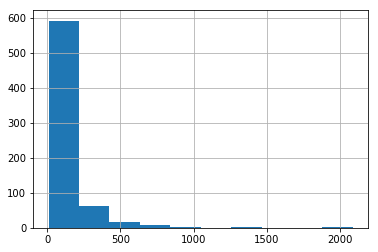

In [28]:
check_normal_by_hist(data_w_imputed, 'C1')

In [25]:
check_normal_by_shapiro(data_w_imputed, 'C1')

(0.5366458892822266, 7.148707300171482e-39)

As shown above, both 

# Step 5A: Create New Columns with Normalized values of non-normal fields
- Apply squaring and log() function
- Leverage Histograms and Shapiro-Wilk test

# Step 5B: Create values outlined in Data Dictionary
- T1-T5 as ratios
- S1-S3 as ratios
- C3', C5', C6'

Reference here: https://github.com/fairfield-university-ba545/project1-archana-s-team/blob/master/DataDictionary20190115.pdf

In [29]:
#calculating C3' ratio


## Converting Continuous data to categorical 


KeyError: "None of [Index(['C3ratio', 'C4ratio', 'C5ratio'], dtype='object')] are in the [columns]"

# Step 6: Correlation of input variables
- Line plot to display correlation
- HeatMap to check correlation

# Step 7A: Data Normalization (Continuous Values)
- Z-Score
- Min-Max Scaling
- Standard Scaler

- Save each type of scaling as seperate set


# Step 7B: Data Normalization (Categorical)
- Identify viable categories (create as few as possible)
- One-hot-encode if needed

# Step 8 Identify and remove redundunt information
- Leverage correlation analysis
- RFE (recursive feature elimination) to select valuable items

# Step 9: Test against sample code
- Test as-is to get baseline for AUC and F1 score
- Test different scaled data
- Test all data vs what we deem should be removed

# Step 10: Look at model specifics to seek room for improvement:
- Coefficiants of remaining fields
- Look at items with highest error rate and see if we can fit them to a class

# Step 11: Alternative Modeling techniques
- Random Forest
- Potentially XGBoost
- See if either of this yields better results

There are 4 companies having a P(1day) trading price as '0' and 1 company having the trading price is 0.8 given their EPS, prior 15 days NASDAQ returnd and trailing 12 months sales, it seemed to not make sense.
  - ACCURIDE CORP
  - Globalstar, Inc. 
  - HERCULES OFFSHORE, INC.
  - SAJAN INC
  - TRONOX INC 


DSW Inc. has a P(1day) trading price as 1.789 with a IPO price quoted for 19 and having a trailing sales of 2599.816




There are 20 companies with having an IPO price quoted between 7-20 and have a trading price for the first day ranging between 100 - 1160. Most of these companies have a negative EPS, negative returns from NASDAQ and low sales which is inconsistent with the data available.

There are two companies trading with a negative EPS of -731.84 and -786.239.
 - GANDER MOUNTAIN CO 
 - NeuroMetrix, Inc.
